<a href="https://colab.research.google.com/github/23521316/ComputerVision/blob/main/SSDs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [2]:
!gdown  https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q

Downloading...
From (original): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
From (redirected): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q&confirm=t&uuid=f387c744-0c83-4392-8a7a-123a77701a70
To: /content/images.zip
100% 29.6M/29.6M [00:00<00:00, 40.7MB/s]


In [3]:
!unzip images.zip

Archive:  images.zip
   creating: images/
  inflating: images/castara.jpeg     
  inflating: __MACOSX/images/._castara.jpeg  
  inflating: images/londonxmas2.jpeg  
  inflating: __MACOSX/images/._londonxmas2.jpeg  
  inflating: images/coffee_view.jpeg  
  inflating: __MACOSX/images/._coffee_view.jpeg  
  inflating: images/gradient.jpg     
  inflating: __MACOSX/images/._gradient.jpg  
  inflating: images/waldo.jpg        
  inflating: __MACOSX/images/._waldo.jpg  
  inflating: images/oxfordlibrary.jpeg  
  inflating: __MACOSX/images/._oxfordlibrary.jpeg  
  inflating: images/Sunflowers.jpg   
  inflating: __MACOSX/images/._Sunflowers.jpg  
  inflating: images/fireworks.jpeg   
  inflating: __MACOSX/images/._fireworks.jpeg  
  inflating: images/londonxmas.jpeg  
  inflating: __MACOSX/images/._londonxmas.jpeg  
  inflating: images/view.jpeg        
  inflating: __MACOSX/images/._view.jpeg  
  inflating: images/coffee.jpg       
  inflating: __MACOSX/images/._coffee.jpg  
  inflating: ima

In [4]:
!gdown https://drive.google.com/uc?id=1I242ygNivRhYJ6kIEfvlAhg_2WMTgDDv

Downloading...
From: https://drive.google.com/uc?id=1I242ygNivRhYJ6kIEfvlAhg_2WMTgDDv
To: /content/SSDs.zip
100% 25.5M/25.5M [00:00<00:00, 232MB/s]


In [5]:
!unzip SSDs.zip

Archive:  SSDs.zip
   creating: SSDs/
  inflating: SSDs/frozen_inference_graph.pb  
  inflating: __MACOSX/SSDs/._frozen_inference_graph.pb  
  inflating: SSDs/ssd_mobilenet_v1_coco.pbtxt  
  inflating: __MACOSX/SSDs/._ssd_mobilenet_v1_coco.pbtxt  


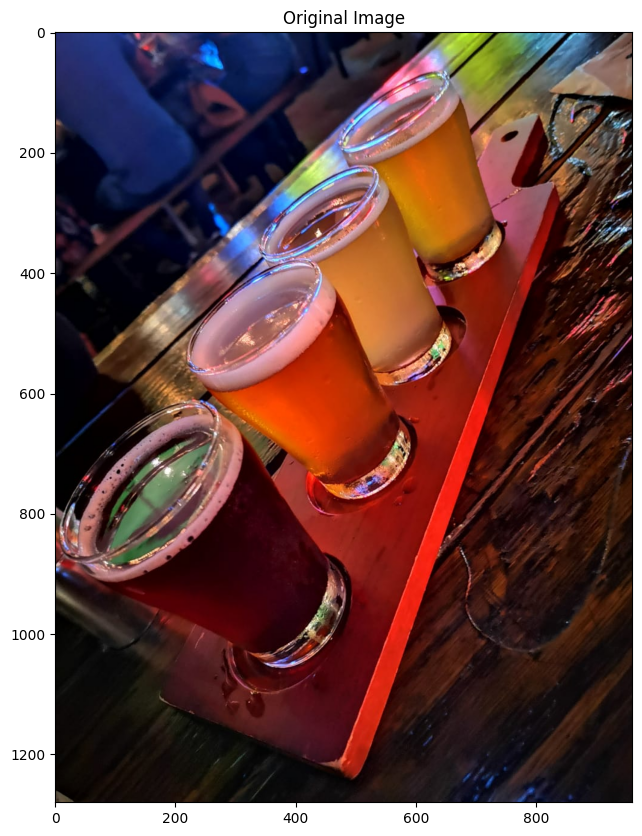

Running our Single Shot Detection on our image ...


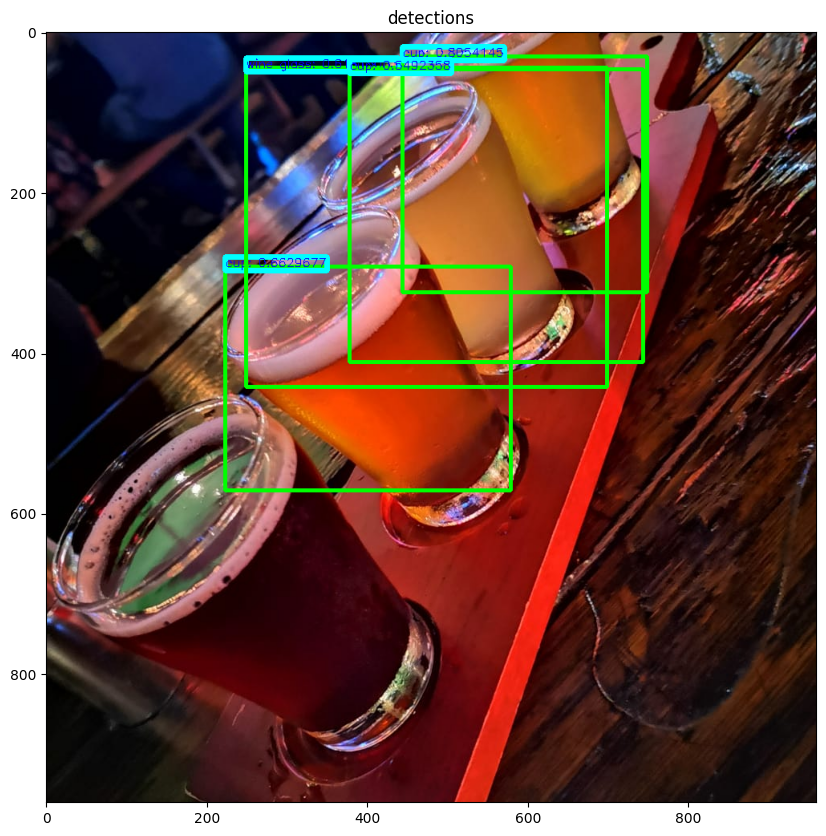

In [19]:
frame = cv2.imread('/content/images/tommys_beers.jpeg')

imshow("Original Image", frame)
print("Running our Single Shot Detection on our image ...")

image = frame.copy()

inWidth = 300
inHeight = 300
WHRatio = inWidth / float(inHeight)

inScaleFactor = 0.007843
meanVal = 127.5

prototxt = "/content/SSDs/ssd_mobilenet_v1_coco.pbtxt"
model = "/content/SSDs/frozen_inference_graph.pb"

num_classes = 90

net = cv2.dnn.readNetFromTensorflow(model, prototxt)

swapRB = True

classNames = {0: 'background',
    1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
    7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
    13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
    18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
    24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
    32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
    37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
    41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
    46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
    51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
    56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
    61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
    67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
    75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
    80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
    86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush' }

blob = cv2.dnn.blobFromImage(frame, inScaleFactor, (inWidth, inHeight), (meanVal, meanVal, meanVal), swapRB)
net.setInput(blob)
detections = net.forward()

cols = frame.shape[1]
rows = frame.shape[0]
if cols / float(rows) > WHRatio:
    cropSize = (int(rows * WHRatio), rows)
else:
    cropSize = (cols, int(cols / WHRatio))

y1 = int((rows - cropSize[1]) / 2)
y2 = y1 + cropSize[1]
x1 = int((cols - cropSize[0]) / 2)
x2 = x1 + cropSize[0]
frame = frame[y1:y2, x1:x2]

cols = frame.shape[1]
rows = frame.shape[0]
for i in range(detections.shape[2]):
  confidence = detections[0, 0, i, 2]
  if confidence > 0.5:
    class_id = int(detections[0, 0, i, 1])

    xLeftBottom = int(detections[0, 0, i, 3] * cols)
    yLeftBottom = int(detections[0, 0, i, 4] * rows)
    xRightTop   = int(detections[0, 0, i, 5] * cols)
    yRightTop   = int(detections[0, 0, i, 6] * rows)

    cv2.rectangle(frame, (xLeftBottom, yLeftBottom), (xRightTop, yRightTop), (0, 255, 0), 3)
    if class_id in classNames:
        label = classNames[class_id] + ": " + str(confidence)
        labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

        yLeftBottom = max(yLeftBottom, labelSize[1])
        cv2.rectangle(frame, (xLeftBottom, yLeftBottom - labelSize[1]),
                                 (xLeftBottom + labelSize[0], yLeftBottom + baseLine),
                                 (255, 255, 0), 5)
        cv2.putText(frame, label, (xLeftBottom, yLeftBottom),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0))

imshow("detections", frame)
